<a href="https://colab.research.google.com/github/Dharil33/Cat-vs-Dog-Classification-CNN/blob/main/Cat_vs_Dog_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2022-09-12 11:05:03--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.147.128, 142.250.125.128, 142.250.136.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.147.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   240MB/s    in 0.3s    

2022-09-12 11:05:04 (240 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os
import zipfile
localzip = '/content/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(localzip,'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
base_dir = '/content/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
train_dogs_dir = os.path.join(train_dir,'dogs')
train_cats_dir = os.path.join(train_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')
validation_cats_dir = os.path.join(validation_dir,'cats')

In [ ]:
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)
print(train_cat_fnames[:10])
print(train_dog_fnames[:10])
print(len(train_dog_fnames))

['cat.778.jpg', 'cat.151.jpg', 'cat.293.jpg', 'cat.386.jpg', 'cat.949.jpg', 'cat.468.jpg', 'cat.651.jpg', 'cat.346.jpg', 'cat.639.jpg', 'cat.247.jpg']
['dog.754.jpg', 'dog.967.jpg', 'dog.409.jpg', 'dog.82.jpg', 'dog.182.jpg', 'dog.197.jpg', 'dog.698.jpg', 'dog.196.jpg', 'dog.414.jpg', 'dog.685.jpg']
1000


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
nrows = 4
ncols = 4
pic_index = 0

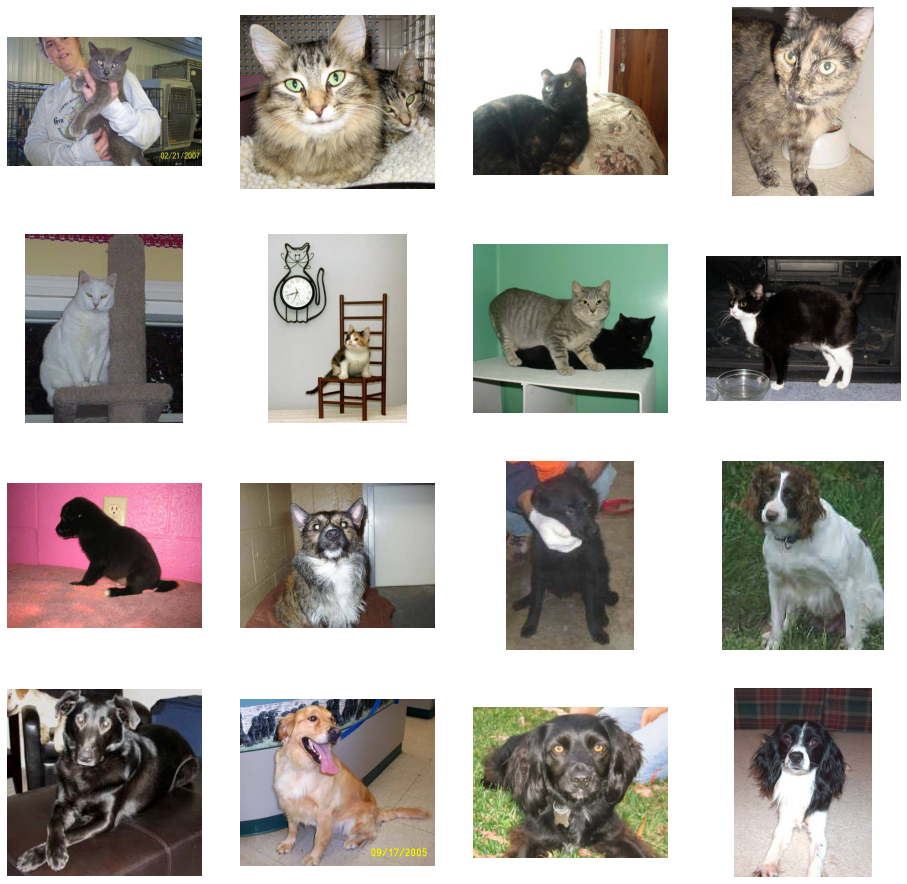

In [ ]:
fig = plt.gcf()
fig.set_size_inches(ncols*4,nrows*4)
pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir,fname) for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir,fname) for fname in train_dog_fnames[pic_index-8:pic_index]]
for i,img_path in enumerate(next_cat_pix+next_dog_pix):
  sp = plt.subplot(nrows,ncols,i+1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  plt.imshow(img)

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [ ]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1.0/255.)
test_datagen = ImageDataGenerator(rescale=1.0/255.)
train_generator = train_datagen.flow_from_directory(train_dir,batch_size=20,class_mode='binary',
                                                    target_size=(150,150))
test_generator = test_datagen.flow_from_directory(validation_dir,batch_size=20,class_mode='binary',
                                                    target_size=(150,150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit(train_generator,validation_data=test_generator,
                    steps_per_epoch=100,
                    epochs=15,
                    validation_steps=50,
                    verbose=2)

Epoch 1/15
100/100 - 13s - loss: 0.8895 - accuracy: 0.5450 - val_loss: 0.6679 - val_accuracy: 0.5690 - 13s/epoch - 127ms/step
Epoch 2/15
100/100 - 9s - loss: 0.6731 - accuracy: 0.6420 - val_loss: 0.5869 - val_accuracy: 0.6930 - 9s/epoch - 90ms/step
Epoch 3/15
100/100 - 10s - loss: 0.5761 - accuracy: 0.7010 - val_loss: 0.6255 - val_accuracy: 0.6680 - 10s/epoch - 96ms/step
Epoch 4/15
100/100 - 9s - loss: 0.5150 - accuracy: 0.7615 - val_loss: 0.6193 - val_accuracy: 0.6740 - 9s/epoch - 91ms/step
Epoch 5/15
100/100 - 9s - loss: 0.4116 - accuracy: 0.8110 - val_loss: 0.6250 - val_accuracy: 0.6950 - 9s/epoch - 90ms/step
Epoch 6/15
100/100 - 9s - loss: 0.3221 - accuracy: 0.8590 - val_loss: 0.8959 - val_accuracy: 0.6540 - 9s/epoch - 90ms/step
Epoch 7/15
100/100 - 9s - loss: 0.2381 - accuracy: 0.9020 - val_loss: 0.7597 - val_accuracy: 0.6920 - 9s/epoch - 90ms/step
Epoch 8/15
100/100 - 9s - loss: 0.1731 - accuracy: 0.9405 - val_loss: 0.9192 - val_accuracy: 0.6890 - 9s/epoch - 89ms/step
Epoch 9/15


In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path,target_size=(150,150))
  x = image.img_to_array(img)
  x = np.expand_dims(x,axis=0)
  images = np.vstack([x])
  classes = model.predict(images,batch_size=20)
  print(classes[0])
  if classes[0]>0:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Saving egypt_kitty_social.webp to egypt_kitty_social (2).webp
[0.]
egypt_kitty_social.webp is a cat
